#  회귀 모델

## 회귀 평가 지표 

- 회귀 알고리즘에도 분류와 마찬가지로 평가 지표들이 존재

- 모델 학습 및 최적화를 위한 오차 최소화에 사용하는 보정치들을 회귀 알고리즘의 평가 지표로 사용
  - MAE(Mean Absolute Error) : 실제 값과 예측값의 차이를 절댓값으로 반환하여 평균한 것, 절대값이므로 음수가 나올 수 없으며 낮을수록 성능이 좋음<br>
  $MAE={1 \over n}{\displaystyle\sum_{i=1}^{n}{|Y_i-\hat{Y}_i}|}$
  - MSE(Mean Squared Error) : 실제 값과 예측값의 차이를 제곱해 평균한 것, 제곱이므로 음수가 나올 수 없으며 낮을수록 성능이 좋음<br>
  $MSE={1 \over n}{\displaystyle\sum_{i=1}^{n}{(Y_i-\hat{Y}_i)^2}}$
  - RMSE(Root MSE) : MSE값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 경향이 있으므로 이를 보정하기 위하여 MSE에 루트를 씌운 것, 제곱곱이므로 음수가 나올 수 없으며 낮을수록 성능이 좋음<br>
  $RMSE=\sqrt{{1 \over n}{\displaystyle\sum_{i=1}^{n}{(Y_i-\hat{Y}_i)^2}}}$
  - $R^2$ : 분산을 기반으로 예측 성능 평가. 1에 가까울수록 예측 정확도가 높음<br>
  $R^2={{예측값 Variance} \over {실제값 Variance}}$

### Scikit-learn의 LinearRegression 클래스
* 예측값과 실제값의 RSS(Residual Sum of Squares)를 최소화 해 OLS(Ordinary Least Square, 최소제곱법)추정 방식으로 구현한 클래스
    - fit()메서드로 X, y배열을 입력받으면, 회귀계수인 W를 'coef_'속성에, 절편(편향)을 'intercept_'속성에 저장
    - 경사하강법은 SGDRegressor 클래스로 구현
* OLS기반 회귀 계수 예측은 Feature들 간의 독립성에 큰 영향을 받음
    - Feature들 간 상관관계가 높을 경우(다중 공선성(multi-collinearty)이 존재하는 경우), 독립변수들 간에 주고받는 영향이 커져 분산 역시 커지며 오류에 매우 민감
    - 따라서 학습 전 데니터를 가공하는 과정에서 feature들 간의 공선성을 확인해야 하며, 문제가 될 경우 Feature Engineering(파생변수 생성, 변수 제거 등), 규제 적용, 차원 축소 등을 수행하여 공선성을 해소해야 한다.

## 보스턴 주택 가격을 이용한 선형 회귀

|변수명|설명|
|------|----|
|CRIM|지역별 범죄 발생률|
|ZN|25,000평방피트를 초과하는 거주 지역의 비율|
|INDUS|비상업 지역 넓이 비율|
|CHAS|찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)|
|NOX|일산화질소 농도|
|RM|거주할 수 있는 방 개수|
|AGE|1940년 이전에 건축된 소유 주택의 비율|
|DIS|5개 주요 고용센터까지의 가중 거리|
|RAD|고속도로 접근 용이도|
|TAX|10,000달러당 재산세율|
|PTRATIO|지역의 교사와 학생 수 비율|
|B|지역의 흑인 거주 비율|
|LSTAT|하위 계층의 비율|
|PRICE|본인 소유의 주택 가격(중앙값)|

In [1]:
# 패키지 불러오기
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import warnings
from sklearn.datasets import fetch_openml

%matplotlib inline

# 보스턴 주택 가격 데이터셋은 'B'라는 변수가 흑인 인구 비율이라는 것이 문제되어(인종차별성) scikit-learn 0.24 버전부터는 데이터셋 미제공
# 대신 fetch_openml 함수를 사용하여 OpenML 웹사이트에서 Boston 데이터셋을 다운로드 가능
# 경고를 없애기 위해 auto 입력
boston = fetch_openml(name = 'Boston', version = 1, parser = 'auto')
boston_df = boston.data
boston_df['PRICE'] = boston.target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [2]:
# 변수 확인
# null값은 없지만 CHAS, RAD의 Dtype이 category이므로 int로 변환 필요
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  PRICE    506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


In [3]:
# CHAS, RAD의 dtype을 int로 변환
Column_list = ['CHAS', 'RAD']

for n in Column_list:
    boston_df[n] = boston_df[n].astype('int64')
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


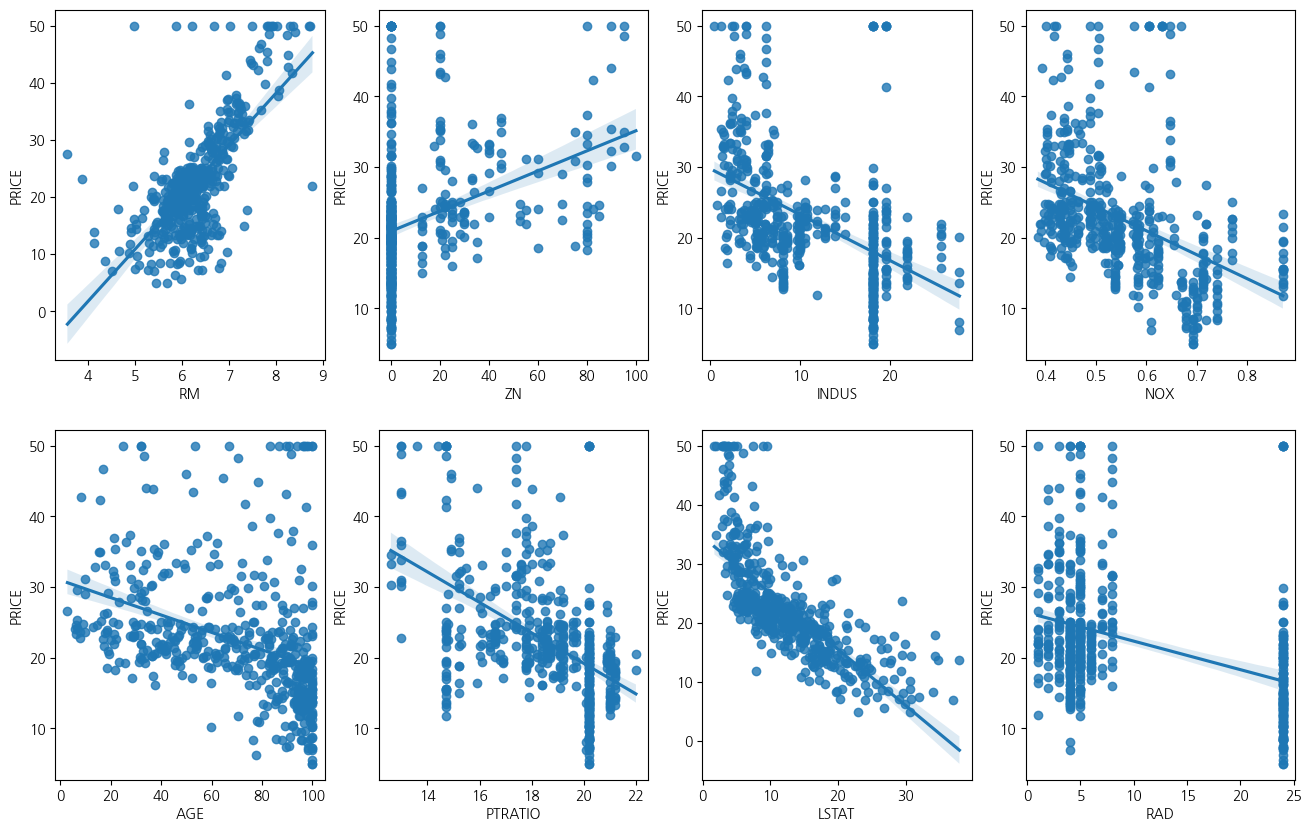

In [4]:
# 4개의 열과 2개의 행을 가진 서브플롯 그리드 생성
fig, axs = plt.subplots(figsize = (16, 10), ncols = 4, nrows = 2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
# enumerate() 함수를 사용하여 피처의 인덱스와 값을 함께 반환
for i, feature in enumerate(lm_features):
    # 4로 나누어 행을 결정(위치 설정)
    row = int(i / 4)
    # 나머지는 열을 결정
    col = i % 4
    # regplot()함수를 사용하여 각 특성과 주택 가격 사이의 관계를 선형회귀 그래프를 그림
    sns.regplot(x = feature, y = 'PRICE', data = boston_df, ax = axs[row][col])
fig1 = plt.gcf()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = boston_df['PRICE']
# PRICE 열 삭제, 원본 데이터에는 영향을 주지 않도록 inplace = False
X_data = boston_df.drop(['PRICE'], axis = 1, inplace = False)

X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size = 0.3, random_state = 156)

# Linear Regression OLS로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)  # 제곱근(square root)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
# y_test(실제값), y_preds(예측값)을 받아서 결정계수 반환, 1에 가까울 수록 좋음 
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297 , RMSE : 4.159
Variance score : 0.757


* 다중 선형 회귀식 :
$Y=W_1X_1+W_2X_2+...+W_nX_n+b$

* 본 모델의 경우,
$X_1=CRIM,\;X_2=ZN, ...$

In [6]:
# 모델이 학습을 통해 찾아낸 절편(b) 및 가중치(W_i)값 확인
# fit() 메서드로 X, y 배열을 입력받으면 'intercept_', 'coef_' 속성에 저장
print('절편 값:', lr.intercept_)
print('가중치 값:', np.round(lr.coef_, 1))

절편 값: 40.995595172164705
가중치 값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [7]:
# 회귀 계수를 큰 값 순으로 정렬
# pd.Series(): 1차원 데이터를 나타내는 Series 객체를 생성
# index = X_data.columns: X_data.columns를 인덱스로 사용
# 인덱스: 계수를 변수와 연결시켜 주는 역할
coeff = pd.Series(np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False) # 내림차순 정렬, True인 경우에는 오름차순

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

### CV를 이용한 MSE, RMSE 산출

* **cross_val, GridSearchCV은 Scoring 함수를 사용하여 평가지표 산출**
    - scoring 함수는 최적화를 위하여 평가지표가 클수록 좋은 성능의 평가지표로 판별
    - 하지만 분류의 accuracy, pricision, recall 등과 달리, MAE, MSE는 낮을 수록 좋은 지표
    - 이를 해결하기 위하여 MAE, MSE는 음수로 산출(parameter 명도 앞에 'neg_'를 붙여 사용)
    - 따라서 산출한 MAE, MSE에 -1을 곱하는 과정 필요
* **cross_val, GridSearchCV는 RMSE 산출을 지원하지 않는다**
    - 산출한 MSE에 루트를 씌워(sqrt()) RMSE 산출 

In [8]:
from sklearn.model_selection import cross_val_score

y_target = boston_df['PRICE']
X_data = boston_df.drop('PRICE', axis = 1)
lr = LinearRegression()

# cross_val_score()의 5 fold set로 MSE를 구한 후, 이를 기반으로 RMSE 산출
# MAE, MSE의 경우, 낮을 수록 좋아서 neg_를 사용해서 음수화 
# cross_val 함수는 높은 값일 수록 좋은 값으로 취급하므로 음수로 변환을 통해 낮은값으로 취급하게 변환해준다
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring = 'neg_mean_squared_error', cv = 5)
# 음수이었던 값을 다시 양수로 변환
mse_scores = -1*neg_mse_scores
rmse_scores = np.sqrt(mse_scores)
avg_rmse = np.mean(rmse_scores)

# 결과 출력
print('# * -1을 취해주기 전 5 folds의 개별 Negative MSE Scores:', np.round(neg_mse_scores, 2))
print('# 5 folds의 개별 MSE Scores:', np.round(mse_scores, 2))
print('# 5 folds의 개별 RMSE Scores:', np.round(rmse_scores, 2))
print('# 5 folds의 평균 RMSE: {:.3f}'.format(avg_rmse) )

# * -1을 취해주기 전 5 folds의 개별 Negative MSE Scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
# 5 folds의 개별 MSE Scores: [12.46 26.05 33.07 80.76 33.31]
# 5 folds의 개별 RMSE Scores: [3.53 5.1  5.75 8.99 5.77]
# 5 folds의 평균 RMSE: 5.829


## 다항회귀(Polynomial Regression)

* 독립변수가 다차항(^2, ^3, ...)을 지닐 때의 회귀

* 지금까지 설명한 회귀는  Y=W1X1+W2X2+...+WnXn+b 와 같이 독립변수와 종속변수의 관계를 1차 방정식으로 표현
* 실제 대부분의 데이터는 1차항 기반 직선적 관계만으로는 표현하는데 한계가 있음
* 다항회귀식의 형태 <br>
$Y=b+W_1X_1+W_2X_2+W_3X_1X_2+W_4X_1^2+W_5X_5^2$
* 단, 회귀선이 곡선 형태를 띈다고 해서 비선형 회귀가 되는 것은 아니다.
* 회귀에서 선형/비선형을 구분하는 기준은 독립변수가 아닌 회귀 계수

### 다항 회귀식으로 변환

(예시) feature가 2개인 경우 변환

- 1차항의 경우 feature<br>
  [$X_1$, $X_2$]

- 1차항을 다차항으로 변환
  - 2차항일 경우 featrue<br>
  $[1,\;X_1,\;X_2,\;X_1^2,\;X_1X_2,\;X_2^2]$
  - 3차항일 경우 feature<br>
   $[1,\;X_1,\;X_2,\;X_1^2,\;X_1X_2,\;X_2^2,\;X_1^3,\;X_1^2X_2,\;X_1X_2^2,\;X_2^3]$
  - 4차항, 5차항, 6차항, ...


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 단항식 feature생성, [[0, 1], [2, 3]]의 2x2 행렬 생성
X = np.arange(4).reshape(2, 2)
print('일차 단항식 feature:\n', X)

# 매개변수를 2로 설정하여 2차 다항식으로 변환
poly_ftr = PolynomialFeatures(degree = 2).fit_transform(X)
print('변환된 2차 다항식 feature:\n', poly_ftr)

일차 단항식 feature:
 [[0 1]
 [2 3]]
변환된 2차 다항식 feature:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


임의의 3차 다항 회귀 함수를 설정하여 라벨링 후 학습을 통해 모델이 이를 예측하는 과정 확인
- 3차 다항식 : $y=1+2x_1+3x_1^2+4x_2^3$

In [10]:
# 1차 단항식 계수를 3차 단항식 계수로 변환
def polynomial_func(X):
    y = 1 + 2*X[:, 0] + 3*X[:, 0]**2 + 4*X[:, 1]**3
    # 1은 상수
    # 2 * X[:, 0] : X의 0번열에 2을 곱함
    # 3 * X[:, 0]**2 : X의 0번열의 제곱한 값에 3을 곱함
    # 4 * X[:, 1]**3 : 1번열의 세제곱한 값에 4를 곱함

    # [1, 1] + [0, 4] + [0, 12] + [4, 108]
    return y

X = np.arange(4).reshape(2, 2)
print('일차 단항식 feature: \n', X)
y = polynomial_func(X)
print()
print('삼차 다항식 결정값: \n', y)

일차 단항식 feature: 
 [[0 1]
 [2 3]]

삼차 다항식 결정값: 
 [  5 125]


In [11]:
# 3차 다항식 변환 
# 매개변수를 3으로 설정하여 3차 다항식으로 변환
poly_ftr = PolynomialFeatures(degree = 3).fit_transform(X)
print('3차 다항식 feature: \n', poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수\n', np.round(model.coef_, 2))

# 3차항의 계수 [1, 2, 0, 3, 0, 0, 0, 0, 0, 4]와 차이가 있지만 근사
print('Polynomial 회귀 shape', model.coef_.shape)

3차 다항식 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 shape (10,)


In [12]:
# 실제 사용시에는 feature 변환과 선형회귀 적용을 각각 별도로 하는 것보다 scikit-learn의 Pipeline 객체를 이용하며 한번에 구현
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def  polynomial_func(X):
    y = 1 + 2*X[:, 0] + 3*X[:, 0]**2 + 4*X[:, 1]**3
    return y

# Pipeline 객체로 Streamline 하게 Polynomial Feature변환과 Linear Regression을 연결(변환기(transformer)와 추정기(estimator)를 하나의 모델로 결합)
model = Pipeline([('ploy', PolynomialFeatures(degree = 3)),  # 변환기: 입력 변수(X)를 3차 다항시으로 변환
                 ('linear', LinearRegression())])    # 선형 회귀 추정기: 변환된 데이터를 이용하여 선형 회귀 모델 학습
X = np.arange(4).reshape(2, 2)
y = polynomial_func(X)

model = model.fit(X, y)
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


### 과소적합 및 과적합 예시

* 다항 회귀는 곡선 형태의 복잡한 다항 관계를 모델링 가능
* 차수(degree)를 높일수록 더 복잡한 관계를 표현할 수 있지만, 그만큼 학습데이터에만 너무 맞춰지므로 과대적합, 과적합(Overfitting)문제가 발생
* 하지만 차수가 너무 낮으면 모델이 너무 단순화되어 데이터를 충분히 학습하고 설명하기에 부족해져 과소적합(Underfitting)문제 발생

In [13]:
# 학습 데이터의 feature는 0부터 1사이의 값을 가지는 임의의 30개 숫자
# true_fun()을 이용해 X에 대한 cosine 변환값을 계산한 뒤ㅡ 약간의 노이즈를 추가하여 'y'를 생성
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# X는 0부터 1사이의 균일분포에서 샘플링한 임의의 30개 값
np.random.seed(0)
n_samples = 30

# rand는 0과 1사이의 균일분포포에서 무작위 샘플 생성, sort는 오름차순으로 정렬
X = np.sort(np.random.rand(n_samples))

# X에 대한 cosine 변환 값 계산
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# y는 X에 대한 cosine 변환 값에 약간의 노이즈 추가
# randn은 평균이 0이고 표준편차가 1인 정규분포에서 무작위 샘플 생성
y = true_fun(X) + np.random.randn(n_samples) * 0.1

print('# Feature X: ', X)
print()
print('# Target y: ', y)

# Feature X:  [0.0202184  0.07103606 0.0871293  0.11827443 0.14335329 0.38344152
 0.41466194 0.4236548  0.43758721 0.46147936 0.52184832 0.52889492
 0.54488318 0.5488135  0.56804456 0.60276338 0.63992102 0.64589411
 0.71518937 0.77815675 0.78052918 0.79172504 0.79915856 0.83261985
 0.87001215 0.891773   0.92559664 0.94466892 0.96366276 0.97861834]

# Target y:  [ 1.0819082   0.87027612  1.14386208  0.70322051  0.78494746 -0.25265944
 -0.22066063 -0.26595867 -0.4562644  -0.53001927 -0.86481449 -0.99462675
 -0.87458603 -0.83407054 -0.77090649 -0.83476183 -1.03080067 -1.02544303
 -1.0788268  -1.00713288 -1.03009698 -0.63623922 -0.86230652 -0.75328767
 -0.70023795 -0.41043495 -0.50486767 -0.27907117 -0.25994628 -0.06189804]



# Degree 1의 회귀계수: [-1.61]
# Degree 1의 MSE: 0.40772896250986845

# Degree 4의 회귀계수: [  0.47 -17.79  23.59  -7.26]
# Degree 4의 MSE: 0.0432087498723184

# Degree 15의 회귀계수: [-2.98294000e+03  1.03899850e+05 -1.87416981e+06  2.03717199e+07
 -1.44874017e+08  7.09319141e+08 -2.47067173e+09  6.24564702e+09
 -1.15677216e+10  1.56895933e+10 -1.54007040e+10  1.06457993e+10
 -4.91381016e+09  1.35920643e+09 -1.70382078e+08]
# Degree 15의 MSE: 182581084.8263125


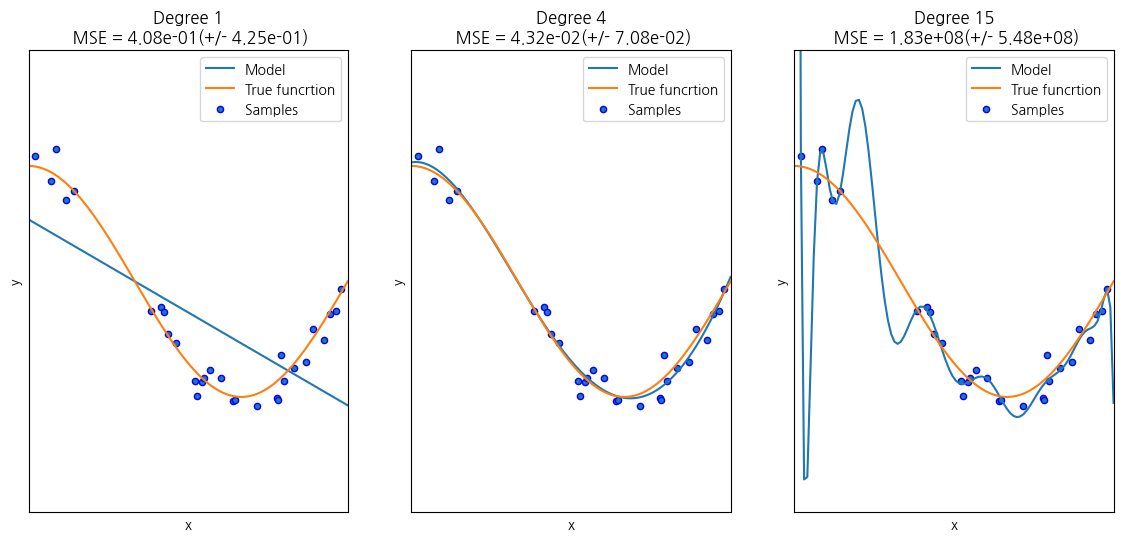

In [14]:
# 단항식, 4차 및 15차 다항식을 생성 후 차수별로 학습 수행
# 이후 CV로 MSE를 구해 차수별 예측 성능 평가
plt.figure(figsize = (14, 6))
# 다항식 차수를 1, 4, 15로 변경하면서 예측 결과 비교
degrees = [1, 4, 15]

for i in range(len(degrees)):
    # 생성할 서브플롯 총 행수: 1, 생성할 서브플롯 총 열수: degrees, 생성할 서브플롯의 순번(i는 0부터 시작하므로 +1) 
    ax = plt.subplot(1, len(degrees), i + 1)
    # x, y 눈금이 나오지 않도록 함
    plt.setp(ax, xticks = (), yticks = ())
    
    # 개별 degree별로 다항식 변환
    # include_bias: 절편을 포함할 지의 여부
    polynomial_features = PolynomialFeatures(degree = degrees[i], include_bias = False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([
        ('polynomial_features', polynomial_features),
        ('linear_regression', linear_regression),
    ])
    pipeline.fit(X[:, np.newaxis], y)
    
    # np.newaxis: 배열의 차원을 증가시키는데 사용
    # CV로 다항 회귀 평가
    scores = cross_val_score(pipeline, X[:, np.newaxis], y, scoring = 'neg_mean_squared_error', cv = 10)
    
    # Pipeline을 구성하는 세부 객체에 접근하는 named_steps['객체명']을 이용하여 회귀 계수 추출
    coeffs = pipeline.named_steps['linear_regression'].coef_
    print('\n# Degree {}의 회귀계수: {}'.format(degrees[i], np.round(coeffs, 2)))
    print('# Degree {}의 MSE: {}'.format(degrees[i], -1*np.mean(scores)))
    
    # 0부터 1까지 테스트 데이터 100개를 샘플링 하여 예측 수행
    # 테스트데이터 세트에 회귀예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교
    # 0부터 1까지의 범위를 100개의 등간격으로 나눈 값을 반환
    X_test = np.linspace(0, 1, 100)
    
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label = 'Model')
    # X_test 배열은 1차원으로, pipeline.predict() 메소드는 2차원 배열을 입력으로 받기 때문에 
    # X_test[:, np.newaxis]를 이용하여 X_test 배열의 차원을 2차원으로 변환
    
    # 실제값 곡선
    plt.plot(X_test, true_fun(X_test), label = 'True function')
    plt.scatter(X, y, edgecolor = 'b', s = 20, label = 'Samples')
    plt.xlabel('x')
    plt.ylabel('y')
    
    # 그래프의 x축 범위를 0부터 1까지로 지정
    plt.xlim((0, 1))
    # 그래프의 y축 범위를 -2부터 2까지로 지정
    plt.ylim((-2, 2))
    
    # 자동으로 최적의 위치를 찾아서 범례(legend)를 배치
    plt.legend(loc = 'best')
    # {}: 삽입할 위치 / :.2e : 부동소수점 표기법을 사용해 출력 /  +/- : 표준편차를 나타낼 때 사용 
    # {:2e}는 지수 표기법으로 소수점 이하 2자리까지 표시
    # degrees[i] : 회귀의 차수, -scores.mean() : neg_MSE의 음수 변환, scores.std() : 교차검증에서 얻은 점수의 표준편차 
    plt.title('Degree {}\n MSE = {:.2e}(+/- {:.2e})'.format(degrees[i], -scores.mean(), scores.std()))
plt.show()

* 위의 표를 비교해보면, Degree 1 : 과소적합 / Degree 4 : 좋음 / Degree 15 : 과대적합으로 판단 할 수 있다.

### 편향-분산 트레이드 오프(Bias-Variance Trade Off)
* 편향: 예측 결과가 어느 한 쪽으로 치우친 방향성
* 분산: 예측 결과의 변동성

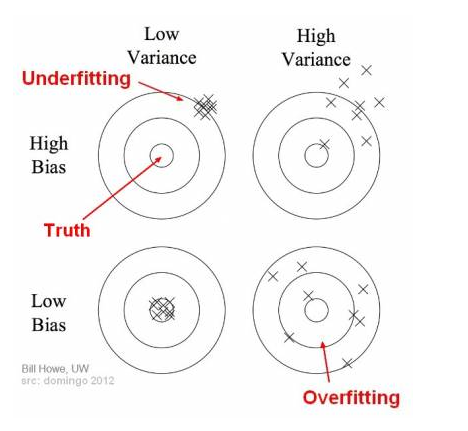

* **저편향/저분산**: 예측 결과가 실제 결과에 매우 잘 근접하면서도 예측 변동이 크지 않고 특정 부분에 집중되어 있는아주 뛰어난 성능을 가진 모델(최적의 모델)
* **저편향/고분산**: 예측 결과가 실제 결과에 비교적 근접하지만, 예측 결과가 실제 결과를 중심으로 넓은 부분에 분포(학습 데이터에 과적합)
* **고편향/저분산**: 정확한 결과에서 벗어나면서, 예측이 특정 부분에 집중되어 있음(모델이 너무 치우쳐져 있어 데이터에 대한 설명력 부족, 과소적합)
* **고편향/고분산**: 예측결과에서 벗어나면서 분포도 넓음

* 저편향/저분산을 추구해야 하지만 편향과 분산은 Trade-off 관계

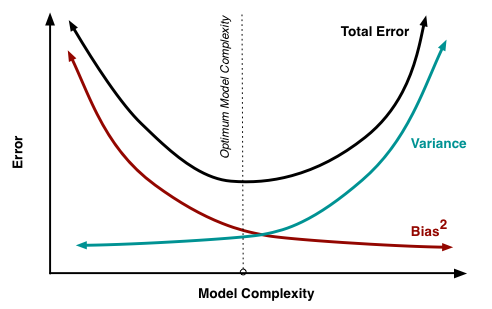

* 그래프의 'Optimum Model Complexity' 부분 좌측이 고편향/저분산의 과소 적합 부분(Total Error 증가)
* 우측이 저편향/고분산의 과대 적합 부분(Total Error증가)
* 'Optimum Model Complexity' 에서 모델을 구축하는 것이 가장 좋으며, 이를 '골디락스 지점'이라고 한다.

## 규제 선형 모델

* 복잡한 회귀식에서 RSS 최소화만을 고려하는 경우, RSS최소화를 위해 모델이 학습데이터에 과하게 맞춰지면서 회귀 계수가 폭증하게 되어, 오류 또한 폭증하게 된다.
* 최적 모델 구축을 위한 비용 함수는 1) 학습 데이터 잔차 오류의 최소화(RSS 최소화)와 함께 2) 회귀 계수의 크기 제어를 함께 달성할 수 있어야 한다.
* 회귀 계수 크기 제어를 달성하기 위하여 패널티인  alpha 를 고안
* 비용함수에 alpha값으로 패널티를 부여하여 회귀 계수 값의 크기를 감소시켜 과적합을 개선하는 방식을 '규제'라고 한다.

* 규제는 2가지 방식이 존재
    - W 의 제곱에 패널티를 부여 : L2 방식 → Ridge
    - W 의 절대값에 패널티를 부여 : L1 방식 → Lasso
* Lasso는 영향력 없는 feature의 회귀 계수를 0으로 만든다.
* Ridge와 Lasso를 합친 엘라스틱넷(Elastic Net) 회귀도 존재함
* L1규제인 Lasso는 feature간 상관관계가 높을 경우 중요 feature만 선택하고 나머지 feature들의 회귀계수들은 다 0으로 만드는 성향이 강하다.
* 이 때문에 alpha값에 따라 회귀 계수의 값이 급격하게 변동할 수 있음 -> 이를 줄이고자 L2규제인 Ridge를 추가
* 단점으로 L1과 L2가 결합되어 있기 때문에 수행 시간이 상대적으로 오래 걸린다.

### 릿지회귀와 라쏘회귀 특징
* 두 방식 모두 추정치는 일반선형회귀모형과는 달리 편의가 발생하지만, 분산은 더 작아지게 된다.
* 라쏘회귀의 경우 제약 범위가 각진 형태 -> 파라미터의 일부가 0이 되는 경향
* 릿지회귀의 경우 제약 범위가 원의 형태 -> 파라미터가 0이 되지 않고 전반적으로 줄어드는 경향

### 릿지 회귀(L2규제, Ridge)

* W(가중치)의 제곱에 대해 패널티를 부여하는 방식(L2규제)
* 릿지 회귀는 alpha값이 커질수록 회귀 계수 값을 작게 만든다.

In [15]:
# 데이터 불러오기
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml

boston = fetch_openml(name='Boston', version=1, parser='auto')
boston_df = boston.data
boston_df['PRICE'] = boston.target

 # CHAS, RAD의 Dtype을 int로 변환
for col_nm in ['CHAS', 'RAD']: 
    boston_df[col_nm] = boston_df[col_nm].astype('int64')

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [16]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [17]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# alpha = 10으로 릿지 회귀 수행
ridge = Ridge(alpha = 10)
y_target = boston_df['PRICE']
X_data = boston_df.drop(['PRICE'], axis = 1)

# 평균 제곱 오차(Mean Squared Error, MSE), 5-fold 교차 검증 수행
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring = 'neg_mean_squared_error', cv = 5)
# 음수 값으로 계산
# 평균 제곱 오차 값을 이용하여 RMSE 값을 계산
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print('5 folds의 개별 RMSE scores: ', np.round(rmse_scores, 3))
print('5 folds의 평균 RMSE scores: {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores:  [-11.422 -24.294 -28.144 -74.599 -28.517]
5 folds의 개별 RMSE scores:  [3.38  4.929 5.305 8.637 5.34 ]
5 folds의 평균 RMSE scores: 5.518


In [18]:
# ridge에 사용할 alpha 값의 list 정의
alphas = [0, 0.1, 1, 10, 100]

# alphas list 값을 반복하면서 alpha에 따른 평균 RMSE를 구함
for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    
    # 5fold 평균 RMSE 산출
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring = 'neg_mean_squared_error', cv = 5)
    avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
    print('alpha {}일때 5folds의 평균 RMSE: {:.4f}'.format(alpha, avg_rmse))

alpha 0일때 5folds의 평균 RMSE: 5.8287
alpha 0.1일때 5folds의 평균 RMSE: 5.7885
alpha 1일때 5folds의 평균 RMSE: 5.6526
alpha 10일때 5folds의 평균 RMSE: 5.5182
alpha 100일때 5folds의 평균 RMSE: 5.3296


C:\Anaconda3\envs\pythonEx\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Anaconda3\envs\pythonEx\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


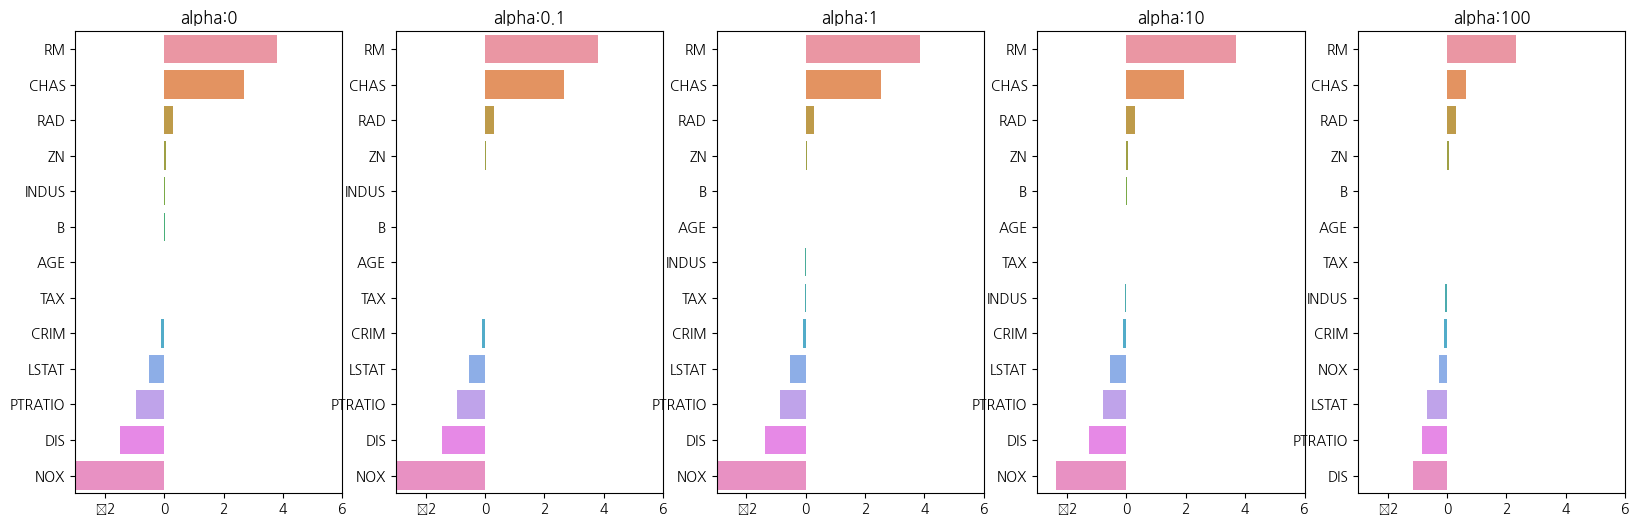

In [19]:
# alpha값 변화에 따른 feature별 회귀 계수 값 변화를 그래프로 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 축 생성
fig, axs = plt.subplots(figsize = (20, 6), nrows = 1, ncols = 5)

# 각 alpha에 따른 회귀계수 값을 저장하기 위한 DataFrame생성
coeff_df = pd.DataFrame()

# alphas list를 반복하며 회귀계수 값 시각화 및 데이터 저장
# pos는 axis의 위치 지정
for pos, alpha in enumerate(alphas):
    # Ridge 모델을 초기화(alpha 값이 클수록 규제의 강도가 커지고, 회귀 계수의 크기가 작아지게 됨)
    ridge = Ridge(alpha = alpha)
    # Ridge 모델을 X_data와 y_target 데이터로 학습
    ridge.fit(X_data, y_target)
    
    # alpha에 따른 feature별로 회귀 계수를 Series로 변환하고 이를 DataFrame column으로 추가
    # 회귀 계수(가중치)를 변수 이름을 인덱스로 하는 Pandas Series 객체로 변환
    coeff = pd.Series(data = ridge.coef_, index = X_data.columns)
    # colname 지정
    colname = 'alpha:' + str(alpha)
    # 회귀계수(가중치)를 데이터프레임에 추가
    coeff_df[colname] = coeff
    
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화, 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending = False)
    axs[pos].set_title(colname)
    # X축을 -3에서 6까지 설정
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x = coeff.values, y = coeff.index, ax = axs[pos])

In [20]:
# 표 출력
sort_column = 'alpha:' + str(alphas[0])
coeff_df.sort_values(by = sort_column, ascending = False)
# 감소 추세 확인 가능
# Ridge는 영향력 없는 feature 더라도 회귀 계수를 0으로 만들진 않음

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


### 라쏘 회귀(L1규제, Lasso)

* W(가중치)의 절댓값에 패널티를 부여하는 L1규제
* L1규제는 불필요한 회귀 계수를 급격하게 감소시켜 0으로 만들고 제거

In [21]:
# 모델별로 각 alpha값을 투입하여 교차검증 수행 및 회귀 계수를 출력하는 함수 작성
def get_linear_reg_eval(model_name, params = None, X_data_n = None, y_target_n = None, verbose = True):
    coeff_df = pd.DataFrame()
    if verbose: print('###### ', model_name , '######')
    for param in params:
        if model_name == 'Ridge': model = Ridge(alpha = param)
        elif model_name == 'Lasso': model = Lasso(alpha = param)
        # l1_ratio = 0.7 -> 라쏘회귀의 비율을 70%, 릿지 회귀의 비율은 30%로 사용
        elif model_name == 'ElasticNet': model = ElasticNet(alpha = param, l1_ratio = 0.7)
            
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring = 'neg_mean_squared_error', cv = 5)
        avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
        print('alpha {}일 때 5fold 세트의 평균 RMSE: {:.4f}'.format(param, avg_rmse))
        
        model.fit(X_data, y_target)
        coeff = pd.Series(data = model.coef_, index = X_data.columns)
        colname = 'alpha:' + str(param)
        coeff_df[colname] = coeff
        
    return coeff_df

In [22]:
# Lasso 회귀 수행
from sklearn.linear_model import Lasso

lasso_alphas = [0.07, 0.1, 0.5, 1.3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params = lasso_alphas, X_data_n = X_data, y_target_n = y_target)
coeff_lasso_df

######  Lasso ######
alpha 0.07일 때 5fold 세트의 평균 RMSE: 5.6123
alpha 0.1일 때 5fold 세트의 평균 RMSE: 5.6151
alpha 0.5일 때 5fold 세트의 평균 RMSE: 5.6691
alpha 1.3일 때 5fold 세트의 평균 RMSE: 5.8451


,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1.3
CRIM,-0.098193,-0.097894,-0.083289,-0.051638
ZN,0.049059,0.049211,0.049544,0.048850
INDUS,-0.042120,-0.036619,-0.005253,-0.000000
CHAS,1.434343,0.955190,0.000000,0.000000
NOX,-0.000000,-0.000000,-0.000000,-0.000000
RM,3.789725,3.703202,2.498212,0.018113
AGE,-0.011706,-0.010037,0.003604,0.031350
DIS,-1.176583,-1.160538,-0.936605,-0.511309
RAD,0.270936,0.274707,0.277451,0.255433
TAX,-0.014290,-0.014570,-0.015442,-0.014981


* 위의 표를 통해 라쏘회귀는 alpha값에 따라 영향력 없는 변수의 회귀계수를 0으로 만드는 것을 알 수 있다.

### 엘라스틱넷(Elastic Net) 회귀(L2규제 + L1규제)

* L2규제와 L1규제를 결합한 회귀
* 라쏘회귀가 서로 상관관계가 높은 피처들의 경우에 이들 중에서 중요 피처만을 셀렉션하고 다른 피처들은 모두 회귀계수를 0으로 만드는 성향이 강하다.
* 이런 성향으로 인해 alpha값에 따라 회귀계수 값이 급격히 변동할 수 있음
* 엘라스틱넷은 이것을 완화하기 위해 L2규제를 라쏘회귀에 추가한 것이다.
* L1과 L2 규제가 결합된 규제로 인해 수행시간이 상대적으로 오래 걸린다는 단점을 가진다.

* 주요 생성 파라미터는 'alpha', 'l1_ratio'
* 엘라스틱넷의 규제: a * L1 + b * L2
* a는 L1규제의 alpha값, b는 L2규제의 alpha값
* 예를 들어 l1_ratio가 0이면 a가 0이므로 L2규제와 동일한 것이며, 반대로 l1_ratio가 1이면 b가 0이므로 L1규제와 동일한 것이다.

In [23]:
from sklearn.linear_model import ElasticNet

elastic_alphas = [0.07,0.1,0.5,1,3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params = elastic_alphas, X_data_n = X_data, y_target_n = y_target)
coeff_elastic_df

######  ElasticNet ######
alpha 0.07일 때 5fold 세트의 평균 RMSE: 5.5417
alpha 0.1일 때 5fold 세트의 평균 RMSE: 5.5259
alpha 0.5일 때 5fold 세트의 평균 RMSE: 5.4667
alpha 1일 때 5fold 세트의 평균 RMSE: 5.5969
alpha 3일 때 5fold 세트의 평균 RMSE: 6.0681


,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000
RM,3.574162,3.414154,1.918419,0.938789,0.000000
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
DIS,-1.189438,-1.173647,-0.975902,-0.725174,-0.031208
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417


## 선형 회귀 모형을 위한 데이터 변환

- 선형 회귀 모델은 데이터가 정규 분포 형태를 띄는 것을 선호함

- 따라서 데이터 분포에 왜곡이 있는 경우 scaling을 통하여 분포를 보정, 성능을 향상시킬 수 있음
  - **Standard Scaling** : 평균이 0, 분산이 1인 정규분포를 가진 데이터 세트로 변환
  - **MinMaxScaling** : 최소값이 0이고 최대값이 1인 데이터로 정규화

- Scaling을 수행한 데이터 세트에 다항 특성을 적용하여 성능 향상 가능 (scaling으로 성능 향상이 없는 경우에 적용)

- 원본 데이터에 log변환을 수행하여 분포를 정규분포에 가깝게 수정하여 성능 향상 가능

In [24]:
# 각 유형에 따른 데이터 변환 수행 함수 생성
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

def get_scaled_data(method = None, p_degree = None, input_data = None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        # 그냥 Log만 취할 경우, 언더플로우 문제가 발생할 수 있으므로 log1p를 하는것이 좋다
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data
        
    if p_degree != None:
        scaled_data = PolynomialFeatures(degree = p_degree, include_bias = False).fit_transform(scaled_data)
    return scaled_data

In [25]:
alphas=[0.1,1,10,100]
scale_methods = [(None, None), ('Standard', None), ('Standard', 2), ('MinMax', None), ('MinMax', 2), ('Log', None)]

for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method = scale_method[0], p_degree = scale_method[1], input_data = X_data)
    print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params = alphas, X_data_n = X_data_scaled, y_target_n = y_target, verbose = False)


## 변환 유형:None, Polynomial Degree:None
alpha 0.1일 때 5fold 세트의 평균 RMSE: 5.7885
alpha 1일 때 5fold 세트의 평균 RMSE: 5.6526
alpha 10일 때 5fold 세트의 평균 RMSE: 5.5182
alpha 100일 때 5fold 세트의 평균 RMSE: 5.3296

## 변환 유형:Standard, Polynomial Degree:None
alpha 0.1일 때 5fold 세트의 평균 RMSE: 5.8260
alpha 1일 때 5fold 세트의 평균 RMSE: 5.8029
alpha 10일 때 5fold 세트의 평균 RMSE: 5.6368
alpha 100일 때 5fold 세트의 평균 RMSE: 5.4214

## 변환 유형:Standard, Polynomial Degree:2
alpha 0.1일 때 5fold 세트의 평균 RMSE: 8.8272
alpha 1일 때 5fold 세트의 평균 RMSE: 6.8713
alpha 10일 때 5fold 세트의 평균 RMSE: 5.4849
alpha 100일 때 5fold 세트의 평균 RMSE: 4.6344

## 변환 유형:MinMax, Polynomial Degree:None
alpha 0.1일 때 5fold 세트의 평균 RMSE: 5.7636
alpha 1일 때 5fold 세트의 평균 RMSE: 5.4650
alpha 10일 때 5fold 세트의 평균 RMSE: 5.7542
alpha 100일 때 5fold 세트의 평균 RMSE: 7.6349

## 변환 유형:MinMax, Polynomial Degree:2
alpha 0.1일 때 5fold 세트의 평균 RMSE: 5.2976
alpha 1일 때 5fold 세트의 평균 RMSE: 4.3227
alpha 10일 때 5fold 세트의 평균 RMSE: 5.1852
alpha 100일 때 5fold 세트의 평균 RMSE: 6.5379

## 변환 유형:Log, Polynomial Degree:N

## 로지스틱 회귀분석

* 선형 회귀 방식을 분류에 적용한 알고리즘(이산형 변수를 예측)

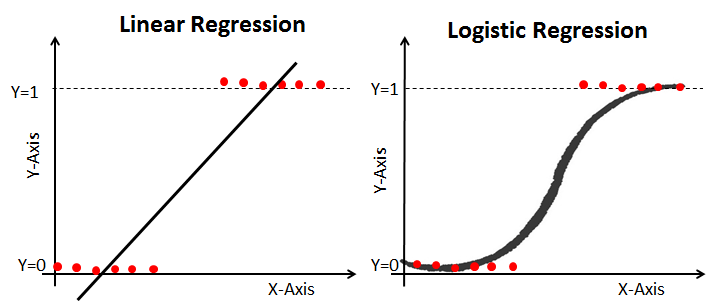

* 종속변수가 0 아니면 1과 같이 이산형으로 있는 경우 그림에서 볼 수 있듯이 회귀선을 통한 제대로된 데이터 설명이 어렵다.
* 로지스틱 회귀는 선형 회기식의 최적선을 찾는 것이 아닌, 시그모이드(Sigmoid) 함수의 최적선을 찾은 후, 최적 시그모이드 함수에 따른 y를 발생 확률로 반환한다.

* 시그모이드 함수의 형태 : $y={1 \over {1+e^{-x}}}$
  - 상기 그래프 처럼 y는 항상 0과 1사이의 값을 반환
  - y값은 x값이 커질수록 1에 근사하며, x값이 작아질수록 0에 근사
  - x=0일 때 y=0.5

* 학습을 통해 구축된 시그모이드함수가 반환하는 확률값에 따라서 0과 1로 분류를 수행한다. 

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# 위스콘신 유방암 데이터 세트를 활용하여 로지스틱 회귀 실습
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

# Data Load
cancer = load_breast_cancer()

In [27]:
# 시그모이드 함수를 사용하긴 하지만 로지스틱 회귀는 앞서 언급한 것 처럼 선형 회귀임
# 선형 회귀는 데이터 분포의 정규성에 영향을 받을 수 있음
# 따라서 scaling 수행
# 표준화를 위한 클래스(각 독립 변수의 평균을 0, 표준 편차를 1로 만듦)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Standard scaling
scaler = StandardScaler()
# cancer 데이터셋에서 특성들을 표준화하는 과정을 거친 데이터를 반환
data_scaled = scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target, test_size = 0.3, random_state = 0)

In [28]:
from sklearn.metrics import accuracy_score, roc_auc_score

# 로지스틱 회귀를 이용하여 학습 및 예측 수행.
# solver 인자값을 생성자로 입력하지 않으면 solver='lbfgs'
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

# accuracy와 roc_auc 측정
print('accuracy: {0:.3f}, roc_auc:{1:.3f}'.format(accuracy_score(y_test, lr_preds), roc_auc_score(y_test , lr_preds)))

accuracy: 0.977, roc_auc:0.972


* solver : 로지스틱 회귀 최적화 알고리즘을 설정
* 문제 유형, 데이터 크기 및 정규화 여부와 같은 다양한 조건에 따라 선택

In [29]:
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']
for solver in solvers:
    # max_iter: 반복하는 최대 횟수
    lr_clf = LogisticRegression(solver = solver, max_iter = 600)
    lr_clf.fit(X_train, y_train)
    lr_preds = lr_clf.predict(X_test)
    
    # accuracy와 roc_auc 측정
    print('solver:{0}, accuracy: {1:.3f}, roc_auc:{2:.3f}'.format(solver, accuracy_score(y_test, lr_preds), roc_auc_score(y_test , lr_preds)))

solver:lbfgs, accuracy: 0.977, roc_auc:0.972
solver:liblinear, accuracy: 0.982, roc_auc:0.979
solver:newton-cg, accuracy: 0.977, roc_auc:0.972
solver:sag, accuracy: 0.982, roc_auc:0.979
solver:saga, accuracy: 0.982, roc_auc:0.979


### LogisticRegression 클래스의 주요 하이퍼 파라미터
- penalty : 규제 유형을 설정, 'l2'는 L2 규제, 'l1'은 L1 규제를 의미. default=l2
- C : 규제 강도를 조절하는 alpha 값의 역수<br>
$C={1 \over alpha}$ <br>
C값이 작을수록 규제 강도가 큼

In [30]:
from sklearn.model_selection import GridSearchCV

params={'solver':['liblinear', 'lbfgs'], 'penalty':['l2', 'l1'], 'C':[0.01, 0.1, 1, 1, 5, 10]}

lr_clf = LogisticRegression()

grid_clf = GridSearchCV(lr_clf, param_grid = params, scoring = 'accuracy', cv = 3)
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

최적 하이퍼 파라미터:{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}, 최적 평균 정확도:0.979
